In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
all_def = pd.read_csv("FBRef Data/Defensive Action.csv", encoding="latin1")
all_ptype = pd.read_csv("FBRef Data/Passing Stats.csv", encoding="latin1")
all_pass = pd.read_csv("FBRef Data/Pass.csv", encoding="latin1")
all_poss = pd.read_csv("FBRef Data/Possesion.csv", encoding="latin1")
all_misc = pd.read_csv("FBRef Data/Misc.csv", encoding="latin1")
all_goal = pd.read_csv("FBRef Data/Goal and Shot Creation.csv", encoding="latin1")
all_std = pd.read_csv("FBRef Data/Standards.csv", encoding="latin1")


In [28]:
all_poss = all_poss[all_poss["90s"] != "90s"]
all_misc = all_misc[all_misc["90s"] != "90s"]
all_goal = all_goal[all_goal["90s"] != "90s"] 
all_def = all_def[all_def["90s"]!= "90s"]
all_ptype = all_ptype[all_ptype["90s"] != "90s"]
all_pass = all_pass[all_pass["90s"] != "90s"]
all_std = all_std[all_std["Rk"] != "Rk"]

C:\Users\91783\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [29]:
all_goal["90s"]= all_goal["90s"].astype("float64")
all_misc["90s"] = all_misc["90s"].astype("float64")
all_poss["90s"] = all_poss["90s"].astype("float64")
all_std["90s"] = all_std["90s"].astype("float64")  
all_std["Age"] = all_std["Age"].astype("float64")  

In [30]:
all_poss = all_poss[all_poss["90s"] > 13.0]
all_misc = all_misc[all_misc["90s"] > 13.0]
all_goal = all_goal[all_goal["90s"] > 13.0] 
all_def = all_def[all_def["90s"] > 13.0]
all_ptype = all_ptype[all_ptype["90s"] > 13.0]
all_pass = all_pass[all_pass["90s"] > 13.0]
all_std = all_std[all_std["90s"] > 13.0]

In [31]:
all_def.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_ptype.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_pass.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_poss.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_misc.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_goal.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_std.drop(columns=["Rk", "Nation" ,"Comp" ,"Born"], inplace=True)


In [32]:
frwds_goals = all_goal[( all_goal["Pos"] == "FW") | (all_goal["Pos"] == "MF,FW") | (all_goal["Pos"] == "FW,MF" ) |( all_goal["Pos"] ==  "FW,DF")]
frwds_misc=  all_misc[( all_misc["Pos"] == "FW") | (all_misc["Pos"] == "MF,FW") | (all_misc["Pos"] == "FW,MF" )|(all_misc["Pos"] ==  "FW,DF")]

In [33]:
frwds_shoot = all_std[( all_std["Pos"] == "FW") | (all_std["Pos"] == "MF,FW") | (all_std["Pos"] == "FW,MF" ) |(all_std["Pos"] ==  "FW,DF")]

In [24]:
frwds_shoot = frwds_shoot[frwds_shoot["Age"]< 24]

In [25]:
frwds_xg_xa= frwds_shoot.sort_values("npxG+xA",ascending=False)

In [34]:
frwds_shoot[frwds_shoot["Player"] ==  "Emi Buendía"]

,Player,Pos,Squad,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,xA,xG+xA,npxG+xA
399,Emi Buendía,"FW,MF",Norwich City,22.0,27.4,0.04,1.46,0.4,27.5,1.46,...,0,0,0.08,0.08,0.06,-0.05,-0.05,0.26,0.35,0.35


In [35]:
frwds_xg_xa = frwds_xg_xa[(frwds_xg_xa["Player"] == "Jadon Sancho" ) | (frwds_xg_xa["Player"] == "Breel Embolo" ) | (frwds_xg_xa["Player"] == "Raphael Dias Belloli" ) | (frwds_xg_xa["Player"] == "Kai Havertz" ) |(frwds_xg_xa["Player"] == "Riccardo Orsolini" ) |(frwds_xg_xa["Player"] == "Dodi Lukebakio" ) |(frwds_xg_xa["Player"] == "Kingsley Coman" ) |(frwds_xg_xa["Player"] == "Adama Traoré" ) |(frwds_xg_xa["Player"] == "Dejan Kulusevski" ) | (frwds_xg_xa["Player"] == "Nicolò Zaniolo" ) |(frwds_xg_xa["Player"] == "Mama Samba Baldé" ) |(frwds_xg_xa["Player"] == "Richarlison" ) |(frwds_xg_xa["Player"] == "Bertrand Traoré" ) |(frwds_xg_xa["Player"] == "Ismaila Sarr" ) |(frwds_xg_xa["Player"] == "Ferrán Torres" ) | (frwds_xg_xa["Squad"] == "Manchester Utd" ) | (frwds_xg_xa["Player"] == "Federico Chiesa" ) | (frwds_xg_xa["Player"] == "Emi Buendía" )  ]

In [36]:
frwds_xg_xa.reset_index(inplace=True)

In [39]:
frwds_xg_xa["Gls"] = frwds_xg_xa["Gls"].astype("float64")  
frwds_xg_xa["xG"] = frwds_xg_xa["xG"].astype("float64")
frwds_xg_xa["xG+xA"] = frwds_xg_xa["xG+xA"].astype("float64")

frwds_xg_xa

,index,Player,Pos,Squad,Age,90s,Gls,Sh,SoT,SoT%,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,xA,xG+xA,npxG+xA
0,803,Breel Embolo,"FW,MF",M'gladbach,22.0,17.2,0.47,2.56,1.05,40.9,...,0,0.06,0.52,0.48,0.19,-0.06,-0.01,0.28,0.80,0.76
1,2323,Jadon Sancho,"FW,MF",Dortmund,19.0,25.4,0.67,2.05,1.1,53.8,...,0,0,0.37,0.37,0.18,0.3,0.3,0.35,0.72,0.72
2,708,Raphael Dias Belloli,"MF,FW",Rennes,23.0,18.8,0.27,2.29,0.8,34.9,...,0.05,0.05,0.35,0.27,0.12,-0.08,-0.05,0.29,0.64,0.56
3,2151,Marcus Rashford,FW,Manchester Utd,21.0,29.4,0.58,2.86,1.29,45.2,...,0.2,0.27,0.60,0.39,0.14,-0.02,-0.01,0.16,0.75,0.55
4,1105,Kai Havertz,"MF,FW",Leverkusen,20.0,27.3,0.44,2.12,0.92,43.1,...,0.04,0.04,0.33,0.31,0.14,0.11,0.1,0.23,0.56,0.54
5,526,Federico Chiesa,"FW,DF",Fiorentina,21.0,29.3,0.38,3.72,1.37,36.7,...,0.03,0.07,0.39,0.33,0.09,-0.01,0.01,0.19,0.57,0.52
6,1924,Riccardo Orsolini,"FW,MF",Bologna,22.0,29.8,0.27,3.02,0.84,27.8,...,0,0,0.28,0.28,0.09,-0.01,-0.01,0.23,0.50,0.5
7,1621,Anthony Martial,FW,Manchester Utd,23.0,29.2,0.58,2.71,1.3,48.1,...,0,0.03,0.37,0.35,0.13,0.21,0.24,0.14,0.52,0.49
8,1539,Dodi Lukebakio,"FW,MF",Hertha BSC,21.0,22.6,0.31,1.68,0.8,47.4,...,0,0,0.27,0.27,0.16,0.04,0.04,0.22,0.49,0.49
9,566,Kingsley Coman,"FW,MF",Bayern Munich,23.0,16.7,0.24,2.22,0.9,40.5,...,0,0,0.25,0.25,0.11,-0.01,-0.01,0.23,0.48,0.48


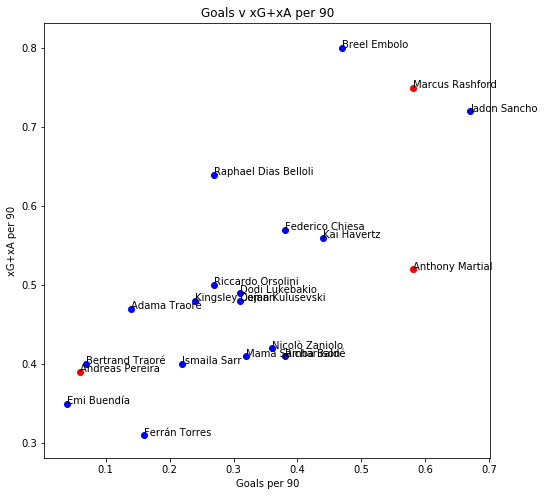

In [40]:
x = frwds_xg_xa["Gls"]
y = frwds_xg_xa["xG+xA"]
z = frwds_xg_xa["Player"]
fig,ax = plt.subplots(1,1,figsize=(8,8))
for i in range(20):
    if frwds_xg_xa["Squad"][i] == "Manchester Utd":
        ax.scatter(x[i],y[i],c ="red")
    else:
        ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Goals per 90")
ax.set_ylabel("xG+xA per 90")
plt.title("Goals v xG+xA per 90")
for i in range(20):
    ax.annotate(z.iloc[i],(x.iloc[i],y.iloc[i]))

    
plt.savefig("RWs xgasis")

In [41]:

frwds_goals["Age"] = frwds_goals["Age"].astype("float64")  
frwds_goals[frwds_goals["Age"] <24]

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Player,Pos,Squad,Age,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,OG
7,Tammy Abraham,FW,Chelsea,21.0,24.6,1.91,1.91,1.34,0,0.24,0.24,0.08,0.41,0.41,0.16,0,0.12,0.08,0.04,0
65,Dele Alli,"MF,FW",Tottenham,23.0,20.5,2.59,2.58,1.9,0.05,0.44,0.1,0.1,0.59,0.58,0.24,0,0.24,0.1,0,0
82,Nadiem Amiri,"MF,FW",Leverkusen,22.0,20.6,4.32,4.31,2.77,1.07,0.29,0.1,0.1,0.44,0.44,0.39,0,0,0,0.05,0
152,Florian Ayé,"FW,MF",Brescia,22.0,15.3,1.96,1.96,1.05,0.07,0.26,0.39,0.2,0.07,0.07,0,0,0,0,0.07,0
189,Jonathan Bamba,"FW,MF",Lille,23.0,21.5,3.53,3.53,2.09,0.56,0.37,0.33,0.19,0.33,0.33,0.23,0,0,0.05,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,Duan Vlahovi?,FW,Fiorentina,19.0,16.7,2.34,2.34,1.26,0,0.36,0.36,0.3,0.12,0.12,0,0,0,0.06,0,0.06
2741,Luca Waldschmidt,"FW,MF",Freiburg,23.0,14.1,2.62,2.63,1.7,0,0.35,0.28,0.28,0.43,0.43,0.28,0,0.07,0,0.07,0
2762,Timo Werner,FW,RB Leipzig,23.0,31.1,3.76,3.77,2.67,0,0.58,0.32,0.19,0.61,0.61,0.39,0,0.16,0,0.06,0
2776,Harry Wilson,"MF,FW",Bournemouth,22.0,18.3,2.35,2.35,1.64,0.16,0.05,0.11,0.38,0.16,0.16,0.05,0,0,0.05,0.05,0


In [42]:
def creating_rw(x):
    x = x[(x["Player"] == "Jadon Sancho" ) | (x["Player"] == "Breel Embolo" ) | (x["Player"] == "Raphael Dias Belloli" ) | (x["Player"] == "Kai Havertz" ) |(x["Player"] == "Riccardo Orsolini" ) |(x["Player"] == "Dodi Lukebakio" ) |(x["Player"] == "Kingsley Coman" ) |(x["Player"] == "Adama Traoré" ) |(x["Player"] == "Dejan Kulusevski" ) | (x["Player"] == "Nicolò Zaniolo" ) |(x["Player"] == "Mama Samba Baldé" ) |(x["Player"] == "Richarlison" ) |(x["Player"] == "Bertrand Traoré" ) |(x["Player"] == "Ismaila Sarr" ) |(x["Player"] == "Ferrán Torres" ) | (x["Squad"] == "Manchester Utd" ) |(x["Player"] == "Federico Chiesa" ) | (x["Player"] == "Emi Buendía" ) ]
    x.reset_index(inplace=True)
    return x

In [43]:
frwds_goal_create = creating_rw(frwds_goals)
frwds_goal_create.reset_index(inplace=True)

In [44]:
frwds_goal_create["GCA"] = frwds_goal_create["GCA"].astype("float64")  
frwds_goal_create["SCA90"] = frwds_goal_create["SCA90"].astype("float64")
frwds_goal_create

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,level_0,index,Player,Pos,Squad,Age,90s,SCA,SCA90,PassLive,...,Sh,Fld,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,OG
0,0,399,Emi Buendía,"FW,MF",Norwich City,22.0,27.4,4.93,4.93,3.03,...,0.11,0.33,0.26,0.26,0.18,0.04,0,0.04,0,0
1,1,526,Federico Chiesa,"FW,DF",Fiorentina,21.0,29.3,3.58,3.58,2.29,...,0.31,0.48,0.48,0.48,0.27,0,0.03,0.07,0.07,0.03
2,2,566,Kingsley Coman,"FW,MF",Bayern Munich,23.0,16.7,4.49,4.49,3.65,...,0.12,0.24,0.60,0.6,0.48,0,0,0,0.12,0
3,3,708,Raphael Dias Belloli,"MF,FW",Rennes,23.0,18.8,4.89,4.90,2.98,...,0.16,0.21,0.37,0.37,0.32,0,0,0,0,0.05
4,4,803,Breel Embolo,"FW,MF",M'gladbach,22.0,17.2,3.26,3.25,2.03,...,0.35,0.52,0.64,0.64,0.41,0,0,0.06,0.12,0.06
5,5,1044,Mason Greenwood,FW,Manchester Utd,17.0,14.7,2.45,2.45,2.18,...,0,0.14,0.48,0.48,0.48,0,0,0,0,0
6,6,1105,Kai Havertz,"MF,FW",Leverkusen,20.0,27.3,4.29,4.29,3.55,...,0.15,0.22,0.51,0.51,0.48,0,0.04,0,0,0
7,7,1224,Daniel James,FW,Manchester Utd,21.0,25.4,2.52,2.52,1.73,...,0.2,0.43,0.31,0.31,0.31,0,0,0,0,0
8,8,1385,Dejan Kulusevski,"FW,MF",Parma,19.0,32.6,4.2,4.21,3.31,...,0.21,0.15,0.46,0.46,0.28,0,0.09,0.06,0.03,0
9,9,1539,Dodi Lukebakio,"FW,MF",Hertha BSC,21.0,22.6,2.92,2.92,1.95,...,0.13,0.13,0.49,0.49,0.13,0.09,0.18,0.09,0,0


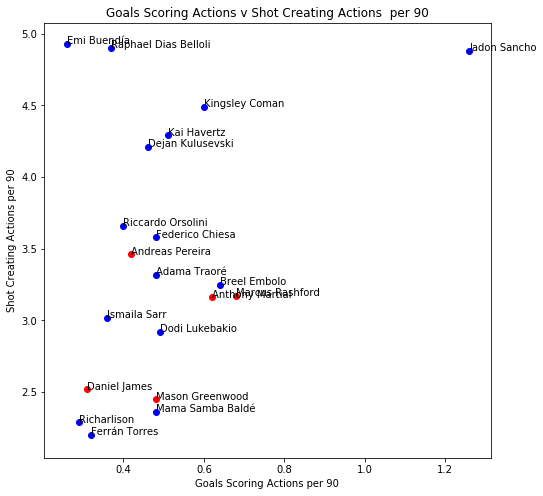

In [45]:

x = frwds_goal_create["GCA"]
y = frwds_goal_create["SCA90"]
z = frwds_goal_create["Player"]
fig,ax = plt.subplots(1,1,figsize=(8,8))
for i in range(20):
    if frwds_goal_create["Squad"][i] == "Manchester Utd":
        ax.scatter(x[i],y[i],c ="red")
    else:
        ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Goals Scoring Actions per 90")
ax.set_ylabel("Shot Creating Actions per 90")
plt.title("Goals Scoring Actions v Shot Creating Actions  per 90")
for i in range(20):
    ax.annotate(z.iloc[i],(x.iloc[i],y.iloc[i]))

    
plt.savefig("GCA v  SCA90")

In [46]:
frwds_goal_create

,level_0,index,Player,Pos,Squad,Age,90s,SCA,SCA90,PassLive,...,Sh,Fld,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,OG
0,0,399,Emi Buendía,"FW,MF",Norwich City,22.0,27.4,4.93,4.93,3.03,...,0.11,0.33,0.26,0.26,0.18,0.04,0,0.04,0,0
1,1,526,Federico Chiesa,"FW,DF",Fiorentina,21.0,29.3,3.58,3.58,2.29,...,0.31,0.48,0.48,0.48,0.27,0,0.03,0.07,0.07,0.03
2,2,566,Kingsley Coman,"FW,MF",Bayern Munich,23.0,16.7,4.49,4.49,3.65,...,0.12,0.24,0.60,0.6,0.48,0,0,0,0.12,0
3,3,708,Raphael Dias Belloli,"MF,FW",Rennes,23.0,18.8,4.89,4.90,2.98,...,0.16,0.21,0.37,0.37,0.32,0,0,0,0,0.05
4,4,803,Breel Embolo,"FW,MF",M'gladbach,22.0,17.2,3.26,3.25,2.03,...,0.35,0.52,0.64,0.64,0.41,0,0,0.06,0.12,0.06
5,5,1044,Mason Greenwood,FW,Manchester Utd,17.0,14.7,2.45,2.45,2.18,...,0,0.14,0.48,0.48,0.48,0,0,0,0,0
6,6,1105,Kai Havertz,"MF,FW",Leverkusen,20.0,27.3,4.29,4.29,3.55,...,0.15,0.22,0.51,0.51,0.48,0,0.04,0,0,0
7,7,1224,Daniel James,FW,Manchester Utd,21.0,25.4,2.52,2.52,1.73,...,0.2,0.43,0.31,0.31,0.31,0,0,0,0,0
8,8,1385,Dejan Kulusevski,"FW,MF",Parma,19.0,32.6,4.2,4.21,3.31,...,0.21,0.15,0.46,0.46,0.28,0,0.09,0.06,0.03,0
9,9,1539,Dodi Lukebakio,"FW,MF",Hertha BSC,21.0,22.6,2.92,2.92,1.95,...,0.13,0.13,0.49,0.49,0.13,0.09,0.18,0.09,0,0


In [47]:
frwds_poss = all_poss[( all_poss["Pos"] == "FW") | (all_poss["Pos"] == "MF,FW") | (all_poss["Pos"] == "FW,MF" ) |(all_poss["Pos"] ==  "FW,DF")]
frwds_poss["Age"] = frwds_poss["Age"].astype("float64")  
frwds_poss = frwds_poss[frwds_poss["Age"]< 24]

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
frwds_poss = creating_rw(frwds_poss)

In [49]:
frwds_poss.columns

Index(['index', 'Player', 'Pos', 'Squad', 'Age', '90s', 'Touches', 'Def Pen',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Succ', 'Att',
       'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist', 'Targ', 'Rec',
       'Rec%', 'Miscon', 'Dispos'],
      dtype='object')

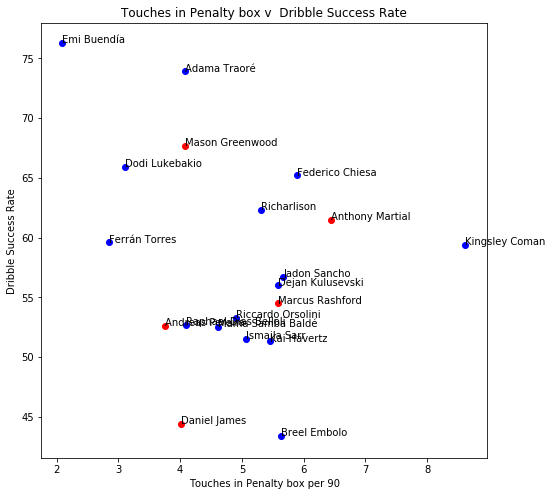

In [50]:
x = frwds_poss["Att Pen"]
y = frwds_poss["Succ%"]
z = frwds_poss["Player"]
fig,ax = plt.subplots(1,1,figsize=(8,8))
for i in range(20):
    if frwds_poss["Squad"][i] == "Manchester Utd":
        ax.scatter(x[i],y[i],c ="red")
    else:
        ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Touches in Penalty box per 90")
ax.set_ylabel("Dribble Success Rate")
plt.title("Touches in Penalty box v  Dribble Success Rate")
for i in range(20):
    ax.annotate(z.iloc[i],(x.iloc[i],y.iloc[i]))

    
plt.savefig("Touches in Penalty box v  Dribble Success Rate")

In [41]:
market_val = pd.read_csv("FBRef Data/MarketVal.csv", encoding="latin1")

In [52]:
frwds_poss["Succ%"]

0     76.3
1     65.2
2     59.4
3     52.7
4     43.4
5     67.7
6     51.3
7     44.4
8     56.0
9     65.9
10    61.5
11    53.3
12    52.6
13    54.5
14    62.3
15    52.5
16    56.7
17    51.5
18    59.6
19    73.9
20    53.8
21    64.3
Name: Succ%, dtype: float64

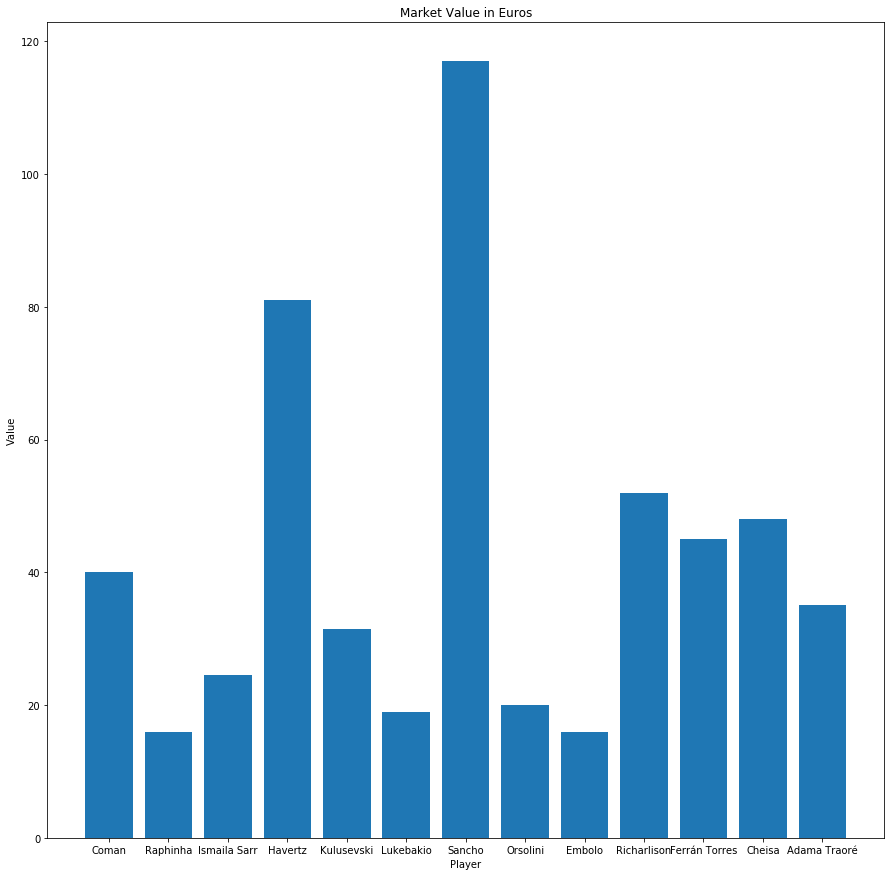

In [46]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.bar(x=market_val["Player"], height=market_val["Value"])
ax.set_xlabel("Player")
ax.set_ylabel("Value")
plt.title("Market Value in Euros")
plt.savefig("Market Valuef")

KeyError: 13

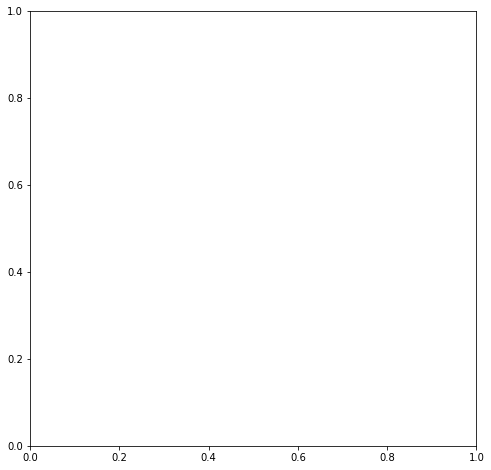

In [45]:
x = market_val["Value"]
y = frwds_xg_xa["xG+xA"]
z = market_val["Player"]
fig,ax = plt.subplots(1,1,figsize=(8,8))

ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Value")
ax.set_ylabel("xG+xA per 90")
plt.title("Value v  xG+xA per 90")
for i in range(20):
    ax.annotate(z.iloc[i],(x.iloc[i],y.iloc[i]))

    
plt.savefig("Value v xG+xA")